In [4]:
'''
activation
활성화 함수 : linear(선형회귀) : 연속적인 값에 대한 결과를 가져올때
              sigmoid(참/거짓 : 이항) : 렐루(ReLU),
                                 하이퍼볼릭 탄젠트(hyperbolic tangent)
                                 소프트 플러스(softplus)
              softmax(다항분류) : 출력결과가 여러개인 경우: 0.2 + 0.6 + 0.3 = 1 : 최고값이 답

loss
손실함수 :  평균제곱오차(mse) : mean_squared_error
            평균 절대오차(mae)
            평균절대백분율오차(mape)
            평균제곱로그오차(msle)
            이형교차엔트로피(binary_crossentropy) : 이항분류
            범주형 교차 엔트로피(calegorical_crossentropy) : 다항분류

optimizer
오차수정함수 : 경하강법(gd) : 확률적경사하강법(sgd) : 아다그라이드(adagrad) : 알엠에스프롭(RMSProp): 아담(adam)
                                                      모멘트(momentum)                            : 아담(adam)
                                                                                                  : 네스레포트 모멘텀(NAG)

모델수행의 결과 출력(metrics) : 
    accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력
    loss : 학습셋에 대한 손실값을 나타냄
    val_acc : 테스트셋에 대한 정확도를 나타냄
    val_loss : 테스트셋에 대한 손실값을 나타냄
'''
print()

In [5]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 533.6 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.wh


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

#데이터를 불러옴
df = pd.read_csv('https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/house_train.csv')
df

#NaN확인
df.isnull().sum().sort_values(ascending=False).head(20)
                                #오름차순 : ascending
                                #내림차순 : descending
#원-핫 인코딩
#카테고리형 변수를 0과 1로 이루어진 변수
df = pd.get_dummies(df)
#결측지를 전체 칼럼의 평균으로 대체
df = df.fillna(df.mean())
#df.mean()
df

#속성과 클래스로 분리
cols_train = ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

#학습셋과 테스트셋
X_train, X_test, y_train, t_test = train_test_split(X_train_pre, y, test_size = 0.2)


#모델의 구조를 설정
#노드의 수를 늘리면
#-모델은 더 다양하고 복잡한 특징과 패턴을 학습할수 있음
#-노드 수를 무작정 늘리면 과적합의 위험이 증가할 수 있음
#-노드 수가 많을 수록 모델의 계산 비용이 증가함
#-데이터의 특성, 문제의 복잡성, 사용가능한 훈련 데이터 양등을 고려하여 노드 수를 조절해야함
#-노드 수를 정하는 방법
#-교차검증, 그리드서치, 경험적방법
#-자동화된 하이퍼 파라미터 최적화도구 사용
model = Sequential()
model.add(Dense(10, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

#모델 실행
model.compile(optimizer='adam', loss = 'mean_squared_error')
#20회 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)
#모델의 이름을 정하기
modelpath='./data/model/house.hdf5'
#최적화 모델을 업데이트 하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_loss', verbose=0, save_best_only = True)
#검증셋(validation_split) : 25%
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split= 0.25, 
                    callbacks=[early_stopping_callback, checkpointer])



Epoch 1/2000
28/28 [==============================] - 1s 8ms/step - loss: 38681354240.0000 - val_loss: 39292973056.0000
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 37748797440.0000 - val_loss: 37898735616.0000
Epoch 3/2000
28/28 [==============================] - 0s 3ms/step - loss: 35723591680.0000 - val_loss: 34773004288.0000
Epoch 4/2000
 1/28 [>.............................] - ETA: 0s - loss: 25941972992.0000

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 3ms/step - loss: 31470313472.0000 - val_loss: 28650227712.0000
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 23791001600.0000 - val_loss: 18730911744.0000
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 13099912192.0000 - val_loss: 7671707648.0000
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 4476929536.0000 - val_loss: 2441870592.0000
Epoch 8/2000
28/28 [==============================] - 0s 3ms/step - loss: 2136687872.0000 - val_loss: 2107801600.0000
Epoch 9/2000
28/28 [==============================] - 0s 3ms/step - loss: 2072509696.0000 - val_loss: 2093019392.0000
Epoch 10/2000
28/28 [==============================] - 0s 3ms/step - loss: 2064270464.0000 - val_loss: 2085547392.0000
Epoch 11/2000
28/28 [==============================] - 0s 3ms/step - loss: 2057704064.0000 - val_loss: 2080991744.0000
Epoch 12/2000
28/28 [==============================] - 0s 3ms/

In [50]:
real_prices = []  # 시각화를 위해 실제값 저장
pred_prices = []  # 시각화를 위해 예측값 저장
X_num = []

# SalePrice의 예측값
y_prediction = model.predict(X_test)
y_test
y_prediction
n_iter = 0

# 25개의 샘플에 대해서 시각화
for i in range(min(25, len(y_test))):
    real = y_test[i]
    prediction = y_prediction[i]
    
    # 형식 지정자를 사용하지 않고 출력
    print(f'실제 가격: {real:.2f}, 예측값: {prediction[0].2f}')
    
    real_prices.append(real)
    pred_prices.append(prediction)
    X_num.append(i)

SyntaxError: invalid decimal literal (1893791973.py, line 17)

TypeError: float() argument must be a string or a real number, not 'ellipsis'

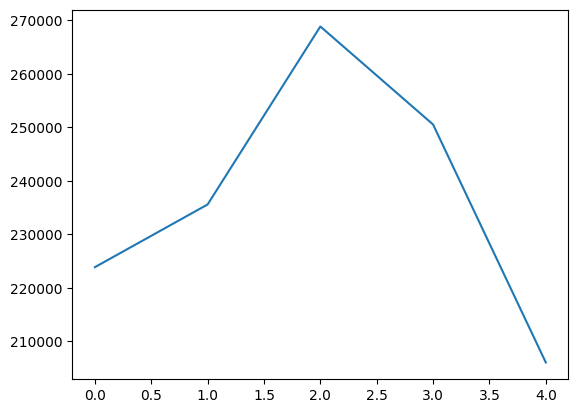

In [49]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_prices, label = 'predicted prices')
plt.plot(X_num, real_prices, label = 'real prices')

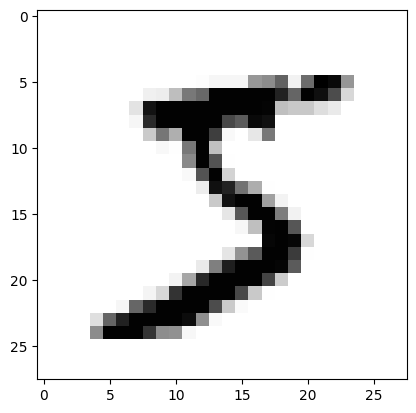

In [58]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape[0] #60000
X_test.shape[0] #10000
plt.imshow(X_train[0], cmap='Greys')

In [60]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [74]:
from tensorflow.keras.utils import to_categorical
X_train #2차원
#차원변환
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape #(60000, 784) 1차원됨
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255

#속성 : X_train[0]
#class : y_train[0]
y_train[0]
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_train[0]

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

#데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#모델 구조를 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

#모델 실행
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델최적화
model.path='./data/model/MNIST_MLP.hdf5'
early_stopping_callback = EarlyStopping(monitor='var_loss', patience=10)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,save_best_only=True)

#모델학습
history = model.fit(X_train, y_train, validation_split= 0.25, epochs=30 \
         , batch_size=200, verbose=1, callback=[early_stopping_callback, checkpointer])

#테스트정확도
model.evaluate(X_test, y_test)[1]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\sdedu\AppData\Local\Temp\ipykernel_11812\3298472973.py", line 24, in <module>
    history = model.fit(X_train, y_train, validation_split= 0.25, epochs=30 \
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'ca

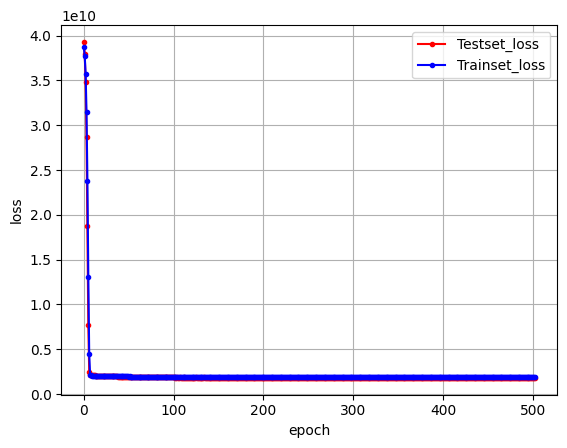

In [82]:
y_val_loss = history.history['val_loss'] #테스트셋
y_loss = history.history['loss'] #학습셋
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#텍스트 전처리와 관련한 함수
from tensorflow.keras.preprocessing.text import text_to_word_sequence

#전처리할 텍스트
text='해보지 않으면 해낼수 없다'
#해당 텍스트를 토큰화
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼수', '없다']

In [88]:
#전처리하려는 세개의 문장을 정함
docs = ['먼저 텍스트의 각 단어들을 나누어 토큰화 한다',
        '텍스트의 단어로 토큰화해야 딥러닝에서 인식됨',
        '토큰화한 결과는 딥러닝에서 사용할수 있음']

token = Tokenizer()
token.fit_on_texts(docs)
#빈도수를 확인 
token.word_counts
#문장의 수
token.document_count
#각단어의 index
token.word_index

{'텍스트의': 1,
 '딥러닝에서': 2,
 '먼저': 3,
 '각': 4,
 '단어들을': 5,
 '나누어': 6,
 '토큰화': 7,
 '한다': 8,
 '단어로': 9,
 '토큰화해야': 10,
 '인식됨': 11,
 '토큰화한': 12,
 '결과는': 13,
 '사용할수': 14,
 '있음': 15}

In [94]:
text = '먼저 텍스트의 각 단어들을 나누어 토큰화 한다'
token = Tokenizer()
token.fit_on_texts([text])
token.word_index
token.word_index['먼저'] #단어가 key가 된걸 확인가능
x = token.texts_to_sequences([text])
x

x = to_categorical(x,len(token.word_index) + 1)
x

array([[[0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

In [123]:
#텍스트 리뷰 자료
docs = ['개 꿀잼','최고임','잘 만든 영화','추천하고 싶은 영화',
        '한번 더 보고싶음','글쎄','별로','생각보다 지루','연기가 어색함', '노잼']

#긍정리뷰는 1, 부정리뷰는 0
classes = array([1,1,1,1,1,0,0,0,0,0])
#토큰화
token = Tokenizer()
token.fit_on_texts(docs)
token.word_index
#index만 출력
print(token.word_index)
x = token.texts_to_sequences(docs)
x

#패딩, 서로 다른 길이의 데이터를 4로 맞춰줌 : pad_sequences
padded_x = pad_sequences(x,4)
padded_x

#임베딩
#입력될 단어의 수
word_size = len(token.word_index) + 1
#단어 임베딩을 포함하여 딥러닝 모델을 만듬
model = Sequential()
model.add(Embedding(word_size,8,input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

#모델실행
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x,classes, epochs=1000)

{'영화': 1, '개': 2, '꿀잼': 3, '최고임': 4, '잘': 5, '만든': 6, '추천하고': 7, '싶은': 8, '한번': 9, '더': 10, '보고싶음': 11, '글쎄': 12, '별로': 13, '생각보다': 14, '지루': 15, '연기가': 16, '어색함': 17, '노잼': 18}
Epoch 1/1000
1/1 [==============================] - 0s 435ms/step - loss: 0.7039 - accuracy: 0.3000
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7020 - accuracy: 0.3000
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.3000
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.3000
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.3000
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.3000
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.3000
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5000
Epoch 9/1000
1/1 [==================

In [122]:
text = '너무 재밋네요'
x_text = token.texts_to_sequences([text])
padded_x_text = pad_sequences(x_text,4)

#예측
result = model.predict(padded_x_text)
print(result)
if result[0][0] >= 0.5:
    print(f'{text}는 긍정')
else:
    print(f'{text}는 부정')

1/1 [==============================] - 0s 20ms/step
[[0.47864288]]
너무 재밋네요는 부정
